In [3]:
%pip install pycaret
%pip install shap

     |████████████████████████████████| 71kB 2.2MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pycaret.classification import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df = pd.read_csv('/content/2.0 Processed Data with Scaled and Log Transformations.csv', index_col='Unnamed: 0')

In [6]:
pd.set_option('display.max_columns',50)
df = df.drop(['first_cont_after','owner_no','ltv_tkt_value','first_order_dt','order_dt','first_cont_dt','tot_contribution_paid_amt','days_to_donation', 'Lifetime Giving'], axis=1)
df.head()

,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,prospect_board,first_cont_order,rolling_tkt_sum,channel_desc_3rd Party,channel_desc_At the Performance,channel_desc_Chat,channel_desc_Default Channel,channel_desc_Email,channel_desc_Fax,channel_desc_Internal Request,channel_desc_Mail,channel_desc_Mobile,channel_desc_Online,channel_desc_Phone,channel_desc_Telefunding,channel_desc_Walk Up,MOS_desc_External,MOS_desc_Internal,MOS_desc_Ticketing,delivery_desc_Digital,delivery_desc_Do Not Print Tickets,delivery_desc_Mail,delivery_desc_Will Call,facility_desc_Academy of Music,facility_desc_Fundraiser,facility_desc_Independence Mall,facility_desc_Other,facility_desc_Perelman,facility_desc_Small venue
0,0.262550,1,5,0,0,0.067821,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,0.280947,1,5,0,0,0.162745,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2,0.170287,1,5,0,0,0.189150,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,0.290096,5,6,0,0,0.093029,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,0.110229,2,4,0,0,0.065087,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [7]:
setup(
    df, 
    target = 'first_cont_order',
    train_size = 0.8,
    fix_imbalance = True,
    create_clusters = True,
    numeric_features = ['geo_area_desc','Prelim Capacity']
)

Setup Succesfully Completed!


,Description,Value
0,session_id,8844
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(70372, 32)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,27
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


(       tot_ticket_paid_amt  geo_area_desc  ...  data_cluster_1  data_cluster_2
 0                 0.262550            1.0  ...             0.0             0.0
 1                 0.280947            1.0  ...             0.0             0.0
 2                 0.170287            1.0  ...             0.0             0.0
 3                 0.290096            5.0  ...             0.0             1.0
 4                 0.110229            2.0  ...             0.0             0.0
 ...                    ...            ...  ...             ...             ...
 70367            -0.720197            2.0  ...             0.0             0.0
 70368            -0.720197            1.0  ...             1.0             0.0
 70369             0.420163            2.0  ...             0.0             0.0
 70370             0.405498            1.0  ...             0.0             0.0
 70371             0.243553            1.0  ...             1.0             0.0
 
 [70372 rows x 61 columns], 0        0

In [8]:
model = compare_models(verbose=True, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.9080,0.6607,0.2645,0.0561,0.0925,0.0652,0.0878,67.1556
1,Light Gradient Boosting Machine,0.8684,0.6949,0.3718,0.0520,0.0912,0.0620,0.0988,2.2833
2,Decision Tree Classifier,0.9177,0.5331,0.2285,0.0558,0.0896,0.0630,0.0807,1.0859
3,Extra Trees Classifier,0.9243,0.5775,0.2044,0.0554,0.0871,0.0610,0.0756,14.4008
4,Random Forest Classifier,0.9271,0.5823,0.1924,0.0549,0.0854,0.0595,0.0725,1.2328
5,K Neighbors Classifier,0.8940,0.6143,0.2735,0.0495,0.0837,0.0554,0.0793,6.4630
6,Gradient Boosting Classifier,0.7677,0.7245,0.5391,0.0411,0.0763,0.0448,0.0972,23.4019
7,Extreme Gradient Boosting,0.7495,0.7191,0.5631,0.0397,0.0741,0.0424,0.0962,12.1436
8,Ada Boost Classifier,0.7072,0.6931,0.5671,0.0341,0.0643,0.0320,0.0802,6.4903
9,Logistic Regression,0.6162,0.6949,0.6664,0.0303,0.0580,0.0249,0.0762,2.8843


In [9]:
model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6350,0.7452,0.7300,0.0347,0.0663,0.0336,0.0992
1,0.6609,0.7639,0.7200,0.0369,0.0701,0.0376,0.1054
2,0.6922,0.6814,0.5400,0.0310,0.0587,0.0259,0.0671
3,0.6760,0.7869,0.7600,0.0405,0.0769,0.0447,0.1218
4,0.6272,0.7122,0.6600,0.0310,0.0592,0.0261,0.0780
5,0.6002,0.7129,0.7200,0.0314,0.0601,0.0270,0.0855
6,0.6677,0.7567,0.7100,0.0371,0.0705,0.0381,0.1051
7,0.6843,0.7298,0.6869,0.0375,0.0711,0.0390,0.1044
8,0.6280,0.7400,0.7273,0.0337,0.0643,0.0318,0.0957
9,0.6447,0.7269,0.7200,0.0352,0.0672,0.0345,0.0998


In [10]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.6346,0.7127,0.672,0.0321,0.0613,0.0284,0.0836


,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,rolling_tkt_sum,prospect_board_0,prospect_board_1,channel_desc_3rd Party_0,channel_desc_3rd Party_1,channel_desc_At the Performance_0,channel_desc_At the Performance_1,channel_desc_Chat_0,channel_desc_Chat_1,channel_desc_Default Channel_0,channel_desc_Default Channel_1,channel_desc_Email_0,channel_desc_Email_1,channel_desc_Fax_0,channel_desc_Fax_1,channel_desc_Internal Request_0,channel_desc_Internal Request_1,channel_desc_Mail_0,channel_desc_Mail_1,channel_desc_Mobile_0,channel_desc_Mobile_1,channel_desc_Online_0,channel_desc_Online_1,channel_desc_Phone_0,channel_desc_Phone_1,channel_desc_Telefunding_0,channel_desc_Telefunding_1,channel_desc_Walk Up_0,channel_desc_Walk Up_1,MOS_desc_External_0,MOS_desc_External_1,MOS_desc_Internal_0,MOS_desc_Internal_1,MOS_desc_Ticketing_0,MOS_desc_Ticketing_1,delivery_desc_Digital_0,delivery_desc_Digital_1,delivery_desc_Do Not Print Tickets_0,delivery_desc_Do Not Print Tickets_1,delivery_desc_Mail_0,delivery_desc_Mail_1,delivery_desc_Will Call_0,delivery_desc_Will Call_1,facility_desc_Academy of Music_0,facility_desc_Academy of Music_1,facility_desc_Fundraiser_0,facility_desc_Fundraiser_1,facility_desc_Independence Mall_0,facility_desc_Independence Mall_1,facility_desc_Other_0,facility_desc_Other_1,facility_desc_Perelman_0,facility_desc_Perelman_1,facility_desc_Small venue_0,facility_desc_Small venue_1,data_cluster_0,data_cluster_1,data_cluster_2,first_cont_order,Label,Score
0,0.050506,1.0,1.0,-0.126224,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.3155
1,-0.720197,1.0,0.0,-0.831507,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.3816
2,0.376876,2.0,5.0,0.172443,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.5883
3,-0.720197,1.0,0.0,-0.831507,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.3731
4,0.254433,1.0,3.0,0.060393,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.5117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14070,-0.720197,2.0,0.0,-0.831507,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.3975
14071,0.234175,1.0,4.0,0.266205,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.5422
14072,-0.720197,1.0,0.0,-0.831507,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.3816
14073,0.205950,3.0,5.0,0.016026,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.

In [ ]:
save_model(model, 'PyCaret on Target 1 - CatBoost', verbose=True)

Transformation Pipeline and Model Succesfully Saved


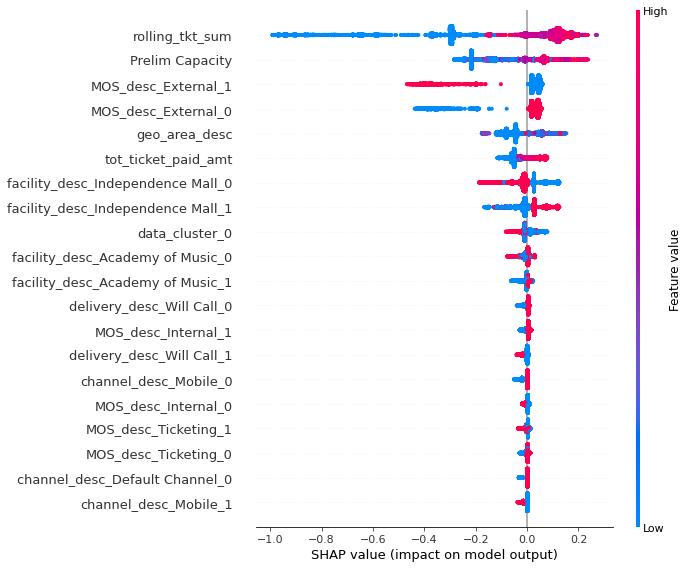

In [11]:
interpret_model(model, plot = 'summary')

In [14]:
model2 = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8776,0.6803,0.3600,0.0545,0.0946,0.0658,0.1013
1,0.8778,0.6966,0.3800,0.0572,0.0995,0.0708,0.1093
2,0.8634,0.6780,0.3200,0.0437,0.0768,0.0470,0.0758
3,0.8748,0.7425,0.4100,0.0597,0.1042,0.0755,0.1183
4,0.8668,0.6807,0.3500,0.0486,0.0854,0.0559,0.0894
5,0.8615,0.7125,0.3700,0.0491,0.0867,0.0571,0.0932
6,0.8654,0.7437,0.4100,0.0554,0.0976,0.0685,0.1109
7,0.8659,0.6760,0.3434,0.0470,0.0826,0.0533,0.0859
8,0.8648,0.6875,0.4343,0.0575,0.1015,0.0727,0.1188
9,0.8662,0.6511,0.3400,0.0472,0.0828,0.0533,0.0853


In [15]:
model2 = tune_model(model2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9025,0.6487,0.2500,0.0501,0.0835,0.0555,0.0764
1,0.9016,0.6602,0.2900,0.0566,0.0948,0.0670,0.0931
2,0.8940,0.6601,0.2700,0.0490,0.0829,0.0545,0.0779
3,0.9025,0.7090,0.3500,0.0674,0.1131,0.0859,0.1198
4,0.8934,0.6587,0.3200,0.0567,0.0964,0.0683,0.0985
5,0.8966,0.6926,0.3300,0.0602,0.1019,0.0740,0.1056
6,0.8940,0.7235,0.3400,0.0602,0.1023,0.0743,0.1073
7,0.8987,0.6477,0.3030,0.0565,0.0952,0.0676,0.0955
8,0.8963,0.6696,0.3636,0.0646,0.1098,0.0823,0.1186
9,0.9002,0.6454,0.3100,0.0592,0.0994,0.0717,0.1004


In [16]:
predict_model(model2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9,0.6795,0.272,0.0526,0.0881,0.0601,0.0838


,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,rolling_tkt_sum,prospect_board_0,prospect_board_1,channel_desc_3rd Party_0,channel_desc_3rd Party_1,channel_desc_At the Performance_0,channel_desc_At the Performance_1,channel_desc_Chat_0,channel_desc_Chat_1,channel_desc_Default Channel_0,channel_desc_Default Channel_1,channel_desc_Email_0,channel_desc_Email_1,channel_desc_Fax_0,channel_desc_Fax_1,channel_desc_Internal Request_0,channel_desc_Internal Request_1,channel_desc_Mail_0,channel_desc_Mail_1,channel_desc_Mobile_0,channel_desc_Mobile_1,channel_desc_Online_0,channel_desc_Online_1,channel_desc_Phone_0,channel_desc_Phone_1,channel_desc_Telefunding_0,channel_desc_Telefunding_1,channel_desc_Walk Up_0,channel_desc_Walk Up_1,MOS_desc_External_0,MOS_desc_External_1,MOS_desc_Internal_0,MOS_desc_Internal_1,MOS_desc_Ticketing_0,MOS_desc_Ticketing_1,delivery_desc_Digital_0,delivery_desc_Digital_1,delivery_desc_Do Not Print Tickets_0,delivery_desc_Do Not Print Tickets_1,delivery_desc_Mail_0,delivery_desc_Mail_1,delivery_desc_Will Call_0,delivery_desc_Will Call_1,facility_desc_Academy of Music_0,facility_desc_Academy of Music_1,facility_desc_Fundraiser_0,facility_desc_Fundraiser_1,facility_desc_Independence Mall_0,facility_desc_Independence Mall_1,facility_desc_Other_0,facility_desc_Other_1,facility_desc_Perelman_0,facility_desc_Perelman_1,facility_desc_Small venue_0,facility_desc_Small venue_1,data_cluster_0,data_cluster_1,data_cluster_2,first_cont_order,Label,Score
0,0.050506,1.0,1.0,-0.126224,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.0032
1,-0.720197,1.0,0.0,-0.831507,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.2268
2,0.376876,2.0,5.0,0.172443,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.7193
3,-0.720197,1.0,0.0,-0.831507,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.1583
4,0.254433,1.0,3.0,0.060393,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0.6703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14070,-0.720197,2.0,0.0,-0.831507,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.3058
14071,0.234175,1.0,4.0,0.266205,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.4387
14072,-0.720197,1.0,0.0,-0.831507,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0.2268
14073,0.205950,3.0,5.0,0.016026,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.

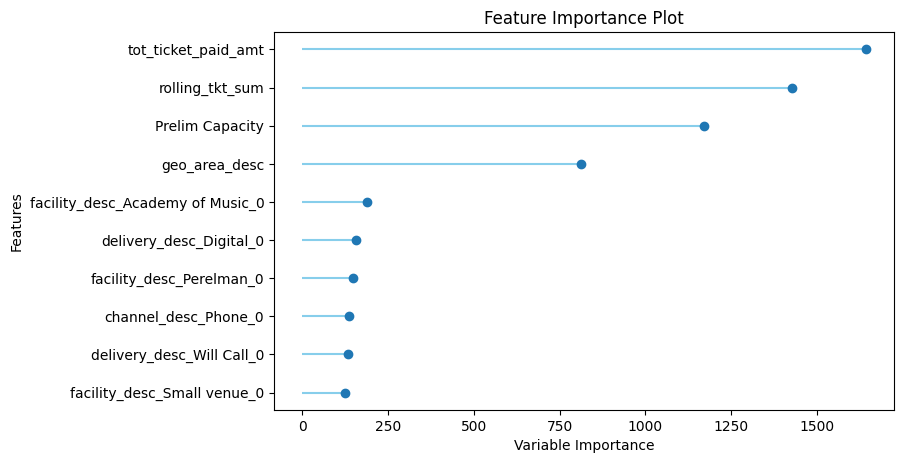

In [19]:
plot_model(model2, 'feature', verbose=True)

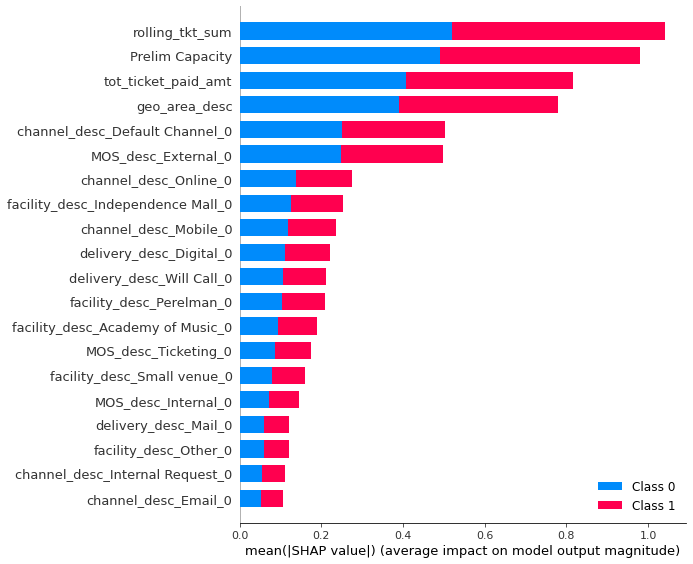

In [20]:
interpret_model(model2, plot='summary')